In [4]:
import numpy as np
import pandas as pd
import os
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
tweets_df = pd.read_csv('/content/Tweets.csv')

In [6]:
# Connect to the SQLite database
conn = sqlite3.connect('/content/database.sqlite')

# Query to list all tables
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the table names
print(tables)


     name
0  Tweets


In [7]:
tweets_df = pd.read_csv('/content/Tweets.csv')

In [8]:
print(tweets_df.head())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [9]:
#Check for missing values in the sentiment column
print(tweets_df['airline_sentiment'].isnull().sum())

0


In [10]:
#Count the number of tweets for each sentiment
sentiment_counts = tweets_df['airline_sentiment'].value_counts()

<ipython-input-11-b23c854996b8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=tweets_df, palette='viridis')


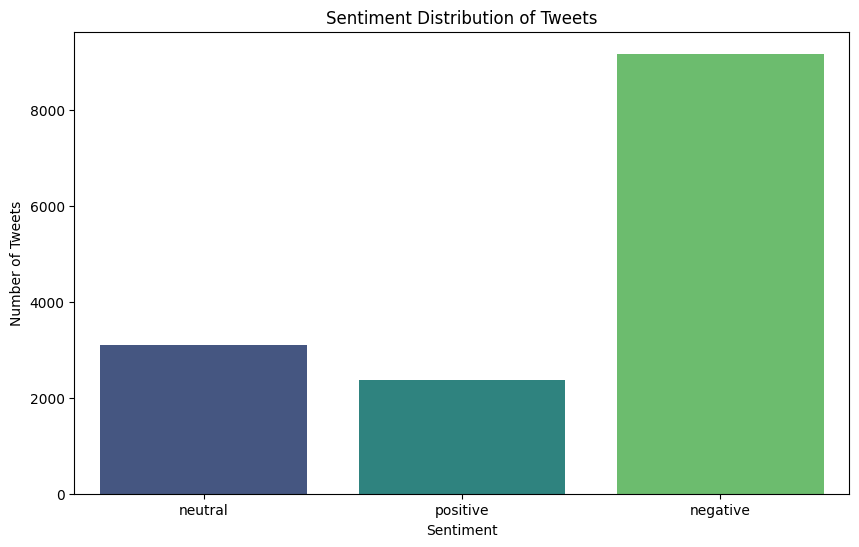

In [11]:
#Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='airline_sentiment', data=tweets_df, palette='viridis')
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
average_confidence = tweets_df['airline_sentiment_confidence'].mean()
print(f'Average Sentiment Confidence: {average_confidence:.4f}')

Average Sentiment Confidence: 0.9002


<ipython-input-15-e84a2ee3bf49>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(ax=axes[0], x='airline_sentiment', y='airline_sentiment_confidence', data=tweets_df, palette='viridis', ci=None)
<ipython-input-15-e84a2ee3bf49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='airline_sentiment', y='airline_sentiment_confidence', data=tweets_df, palette='viridis', ci=None)
<ipython-input-15-e84a2ee3bf49>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[2], x='airline_sentiment', y='retweet_count', data=tweets_df, palette='viridis')


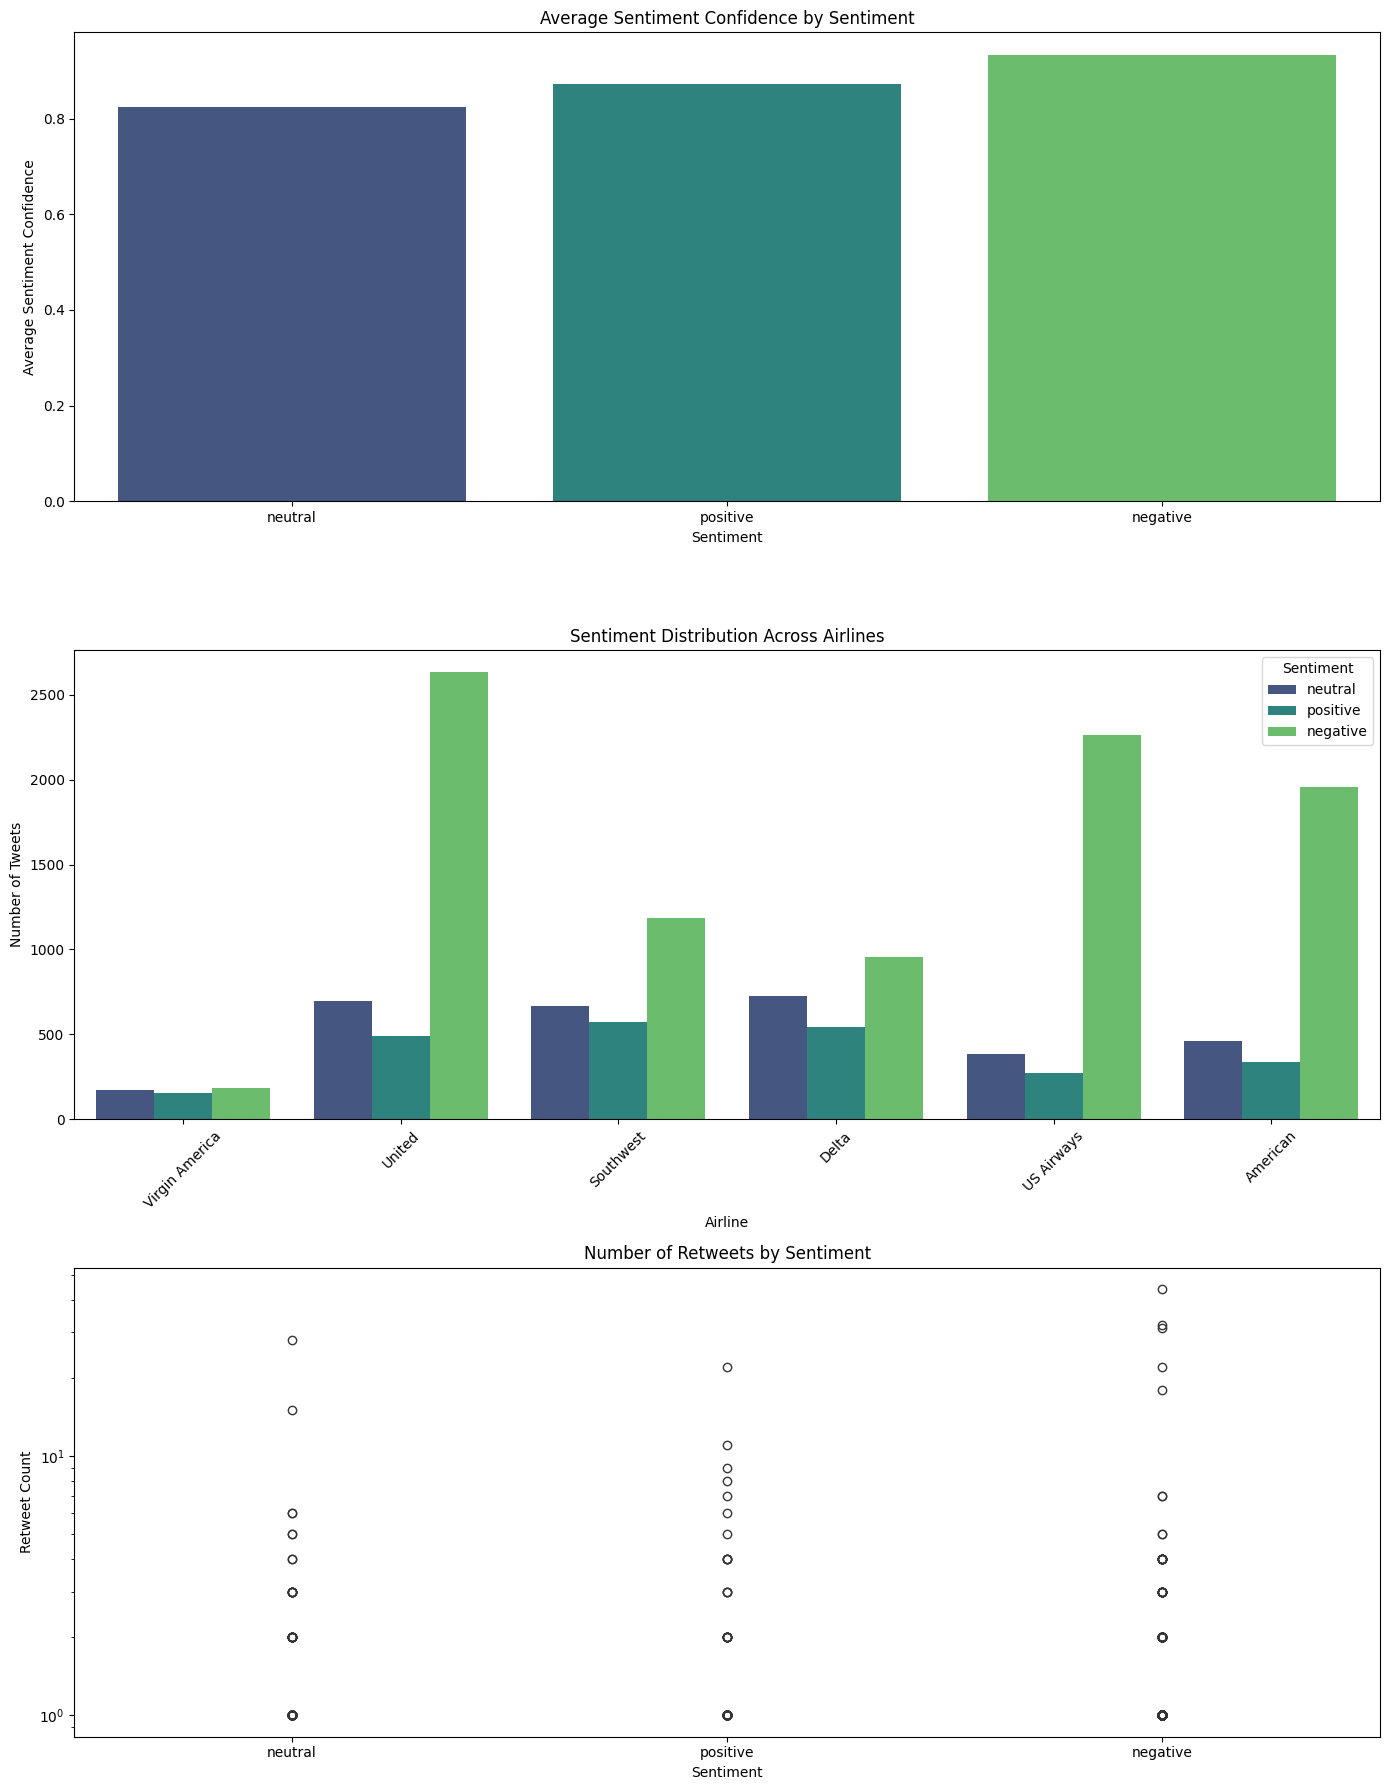

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Average Sentiment Confidence by Sentiment
sns.barplot(ax=axes[0], x='airline_sentiment', y='airline_sentiment_confidence', data=tweets_df, palette='viridis', ci=None)
axes[0].set_title('Average Sentiment Confidence by Sentiment')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Average Sentiment Confidence')

# Sentiment Distribution Across Airlines
sns.countplot(ax=axes[1], x='airline', hue='airline_sentiment', data=tweets_df, palette='viridis')
axes[1].set_title('Sentiment Distribution Across Airlines')
axes[1].set_xlabel('Airline')
axes[1].set_ylabel('Number of Tweets')
axes[1].legend(title='Sentiment')
axes[1].tick_params(axis='x', rotation=45)

# Number of Retweets by Sentiment
sns.boxplot(ax=axes[2], x='airline_sentiment', y='retweet_count', data=tweets_df, palette='viridis')
axes[2].set_title('Number of Retweets by Sentiment')
axes[2].set_xlabel('Sentiment')
axes[2].set_ylabel('Retweet Count')
axes[2].set_yscale('log')  # Using log scale for better visualization

plt.tight_layout()
plt.show()

In [16]:
# Calculate the percentage of each sentiment
total_tweets = len(tweets_df)
sentiment_percentages = (sentiment_counts / total_tweets) * 100
print("Sentiment Percentages:")
print(sentiment_percentages)

Sentiment Percentages:
airline_sentiment
negative    62.691257
neutral     21.168033
positive    16.140710
Name: count, dtype: float64


In [17]:
print("\nOverall Sentiment Analysis:")
if sentiment_percentages['negative'] > sentiment_percentages['positive']:
    print("The overall sentiment of the posts is negative.")
elif sentiment_percentages['positive'] > sentiment_percentages['negative']:
    print("The overall sentiment of the posts is positive.")
else:
    print("The overall sentiment of the posts is neutral.")


Overall Sentiment Analysis:
The overall sentiment of the posts is negative.
